Rata-rata IPM per tahun
 tahun
2004    66.860043
2005    67.476053
2006    68.420409
2007    69.092105
2008    69.582152
2009    70.144162
2010    70.712123
2011    71.291999
2012    71.873669
Name: ipm, dtype: float64

Prediksi rata-rata IPM tahun 2013 =
 72.58956525657891


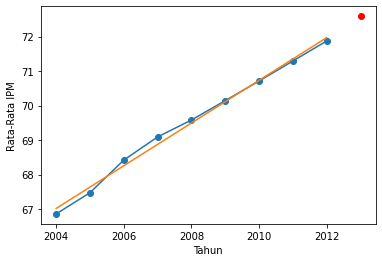


MSE =  0.01632358744245256


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
dataset = pd.read_csv('ipm.csv')
dataset = dataset.dropna()
dataset = dataset.loc[(dataset['nama_provinsi']=='Prov. Jawa Timur')]
data = dataset[['nama_provinsi', 'tahun', 'ipm']]
avg_ipm = data.groupby('tahun')['ipm'].mean()
print('Rata-rata IPM per tahun\n', avg_ipm)
x=avg_ipm.index
y=avg_ipm.values
plt.scatter(x, y)
plt.plot(x, y)
plt.xlabel('Tahun')
plt.ylabel('Rata-Rata IPM')
linreg=LinearRegression()
x=np.array(x).reshape(-1,1)
linreg.fit(x, y)
IPM_2013=np.array(2013).reshape(-1,1)
pred_ipm=linreg.predict(IPM_2013)
print('\nPrediksi rata-rata IPM tahun 2013 =\n', pred_ipm.item())
plt.scatter(IPM_2013, pred_ipm, c='red')
pred_y=linreg.predict(x)
plt.plot(x, pred_y)
plt.show()
MSE=mean_squared_error(y,pred_y)
print('\nMSE = ', MSE)


**Prediksi Outlier**





In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
data={'Nilai': [20,22,18,17,21,30,25,17,80,85,87,77,78,77],
      'Softskill': [10,40,50,52,55,45,53,75,40,80,85,86,88,97]}
df=pd.DataFrame(data, columns=['Nilai','Softskill'])
clf = IsolationForest(contamination=0.3)
pred = clf.fit_predict(df)
df['Outlier']=pred.reshape(-1,1)
print(df)

    Nilai  Softskill  Outlier
0      20         10       -1
1      22         40        1
2      18         50        1
3      17         52        1
4      21         55        1
5      30         45        1
6      25         53        1
7      17         75        1
8      80         40       -1
9      85         80        1
10     87         85       -1
11     77         86        1
12     78         88        1
13     77         97       -1
